## Boston Data Set

The [Boston Data Set](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) contains housing information in Boston collected by the U.S Census Service.  

There are 506 instances and 14 different variables.
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage of lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [2]:
# 00. Acquire the Data Set
bostonURL <- url("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
boston <- read.table(bostonURL)
colnames(boston) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV")
dim(boston)

[1] 506  14

# Developing a Sampling Technique

This notebook tests different sample sizes to find the size that best describes the dataset.

In [3]:
# Libraries
library(dplyr)
library(ggplot2)
library(reshape2)
library(repr)
options(repr.plot.width = 10, repr.plot.height = 6)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'reshape2' was built under R version 3.3.3"Warning message:
"package 'repr' was built under R version 3.3.3"

In [4]:
# Original Data
bostonMean <- sapply(boston,mean)
sampleCompare <- data.frame(feature = colnames(boston))
sampleCompare['boston_mean'] <- bostonMean

### Sample Test 1: n = 5

Using feature as id variables


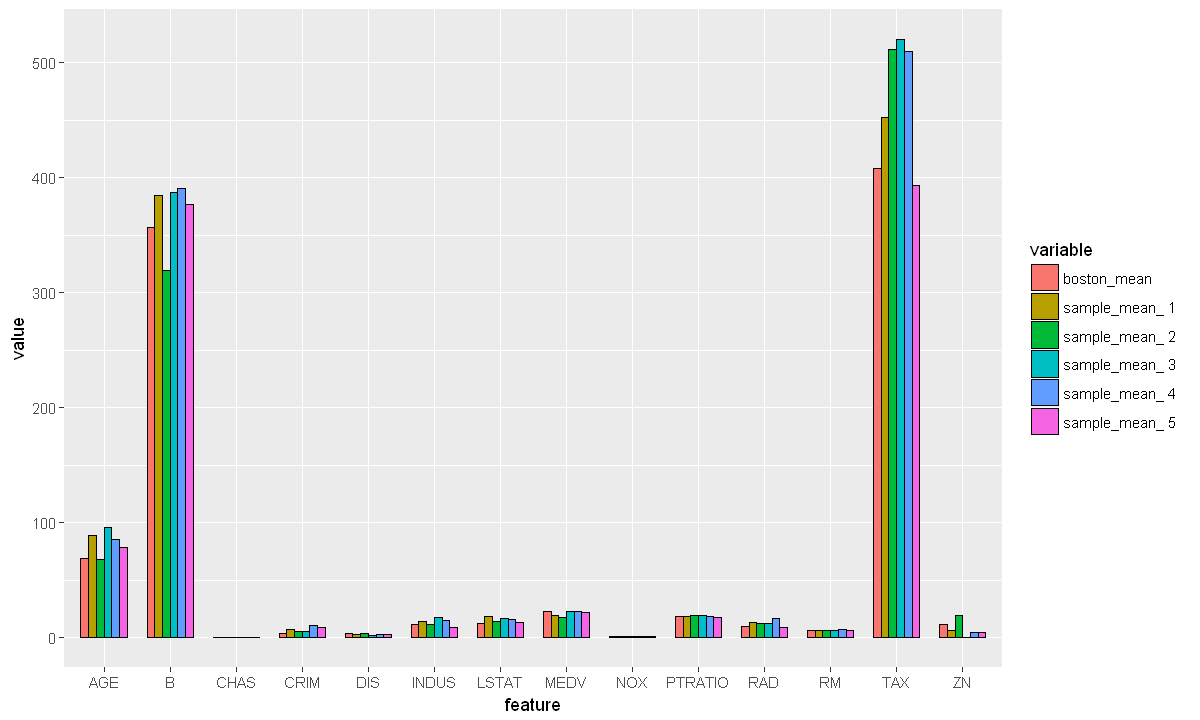

In [5]:
sample = list()
for (i in 1:5) {
    sample[[i]] = sample_n(boston, 5)
    sampleCompare[paste('sample_mean_',i)] = sapply(sample[[i]], mean)
}

ggplot(melt(sampleCompare), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge")

### Sample Test : n = 10

Using feature as id variables


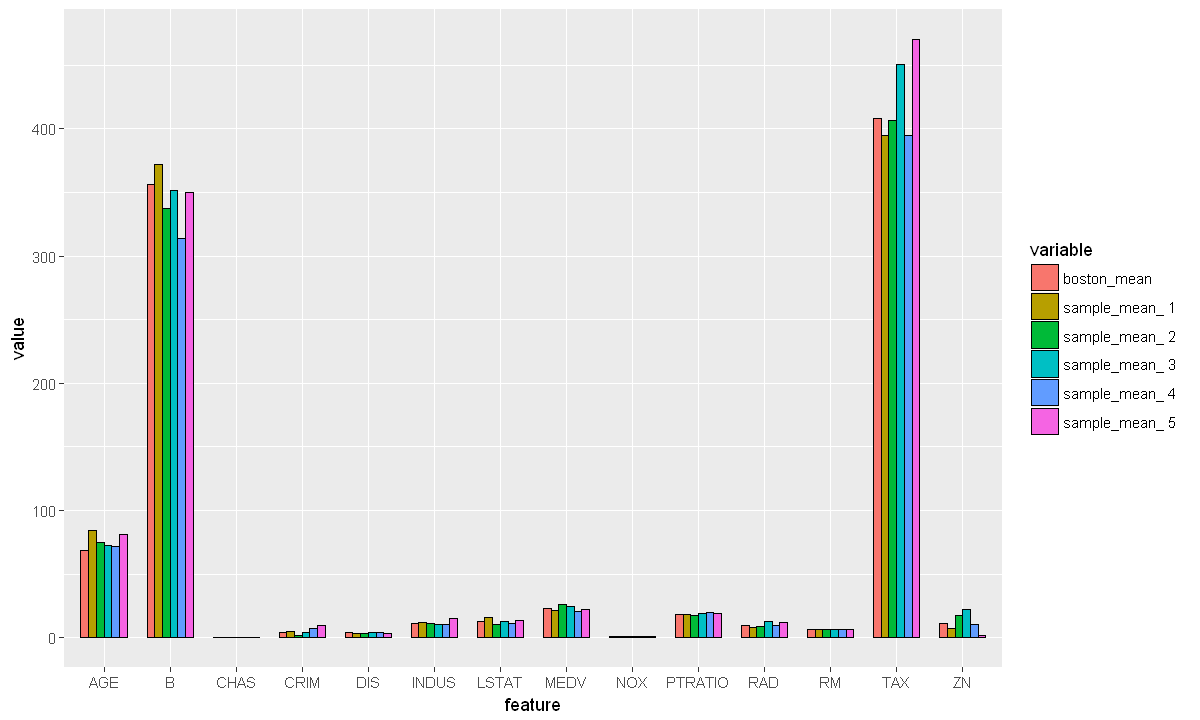

In [6]:
sample = list()
for (i in 1:5) {
    sample[[i]] = sample_n(boston, 10)
    sampleCompare[paste('sample_mean_',i)] = sapply(sample[[i]], mean)
}

ggplot(melt(sampleCompare), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge")

### Sample Test 3: n = 20

Using feature as id variables


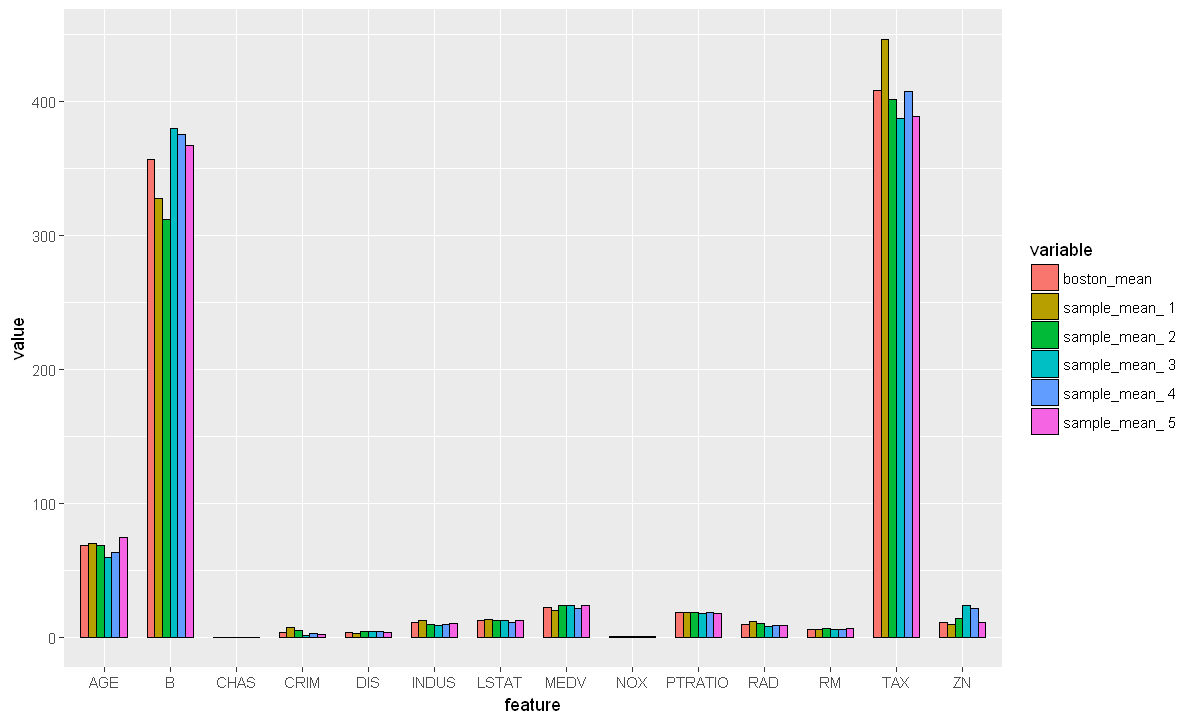

In [7]:
sample = list()
for (i in 1:5) {
    sample[[i]] = sample_n(boston, 20)
    sampleCompare[paste('sample_mean_',i)] = sapply(sample[[i]], mean)
}

ggplot(melt(sampleCompare), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge")

### Sample Test 4: n = 50

Using feature as id variables


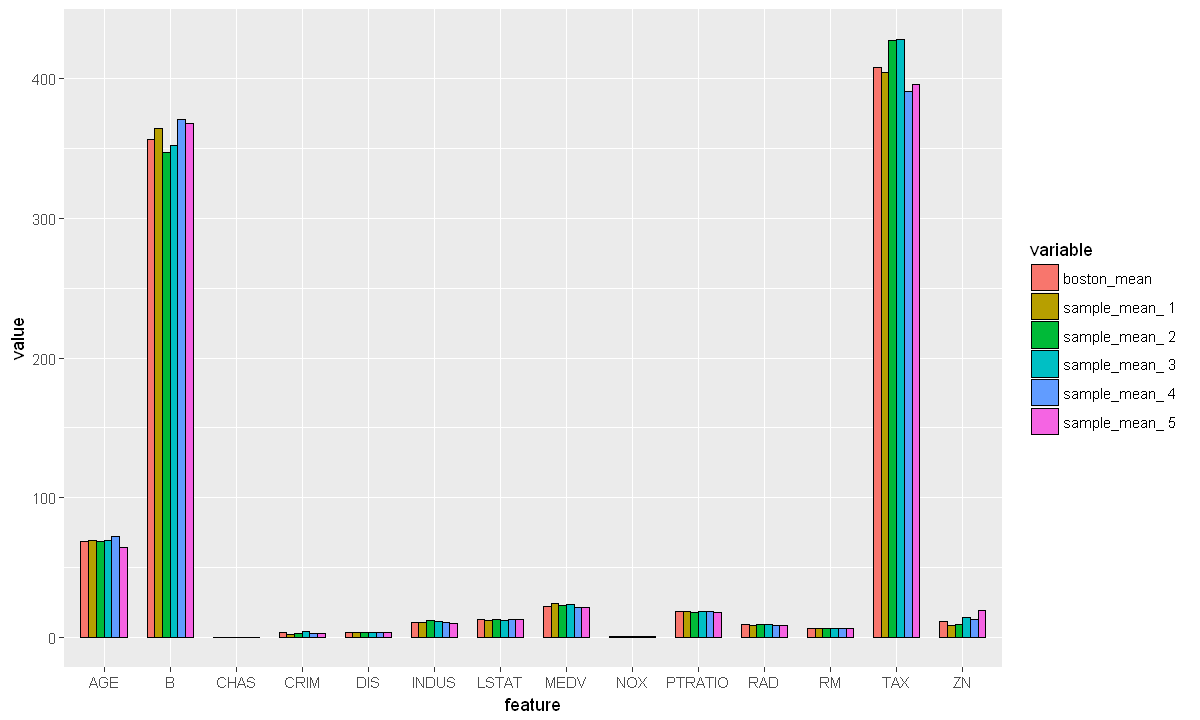

In [8]:
sample = list()
for (i in 1:5) {
    sample[[i]] = sample_n(boston, 50)
    sampleCompare[paste('sample_mean_',i)] = sapply(sample[[i]], mean)
}

ggplot(melt(sampleCompare), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge")

### Sample Test 5: n = 100

Using feature as id variables


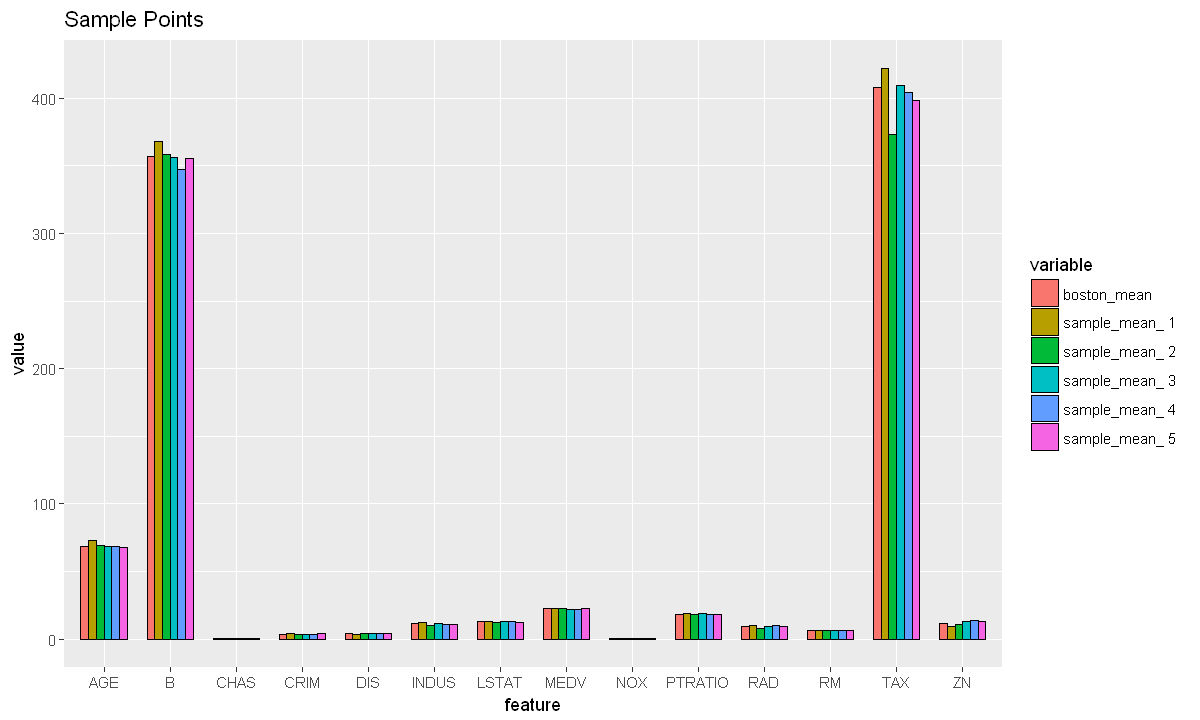

In [12]:
sample = list()
for (i in 1:5) {
    sample[[i]] = sample_n(boston, 100)
    sampleCompare[paste('sample_mean_',i)] = sapply(sample[[i]], mean)
}

ggplot(melt(sampleCompare), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge")

As you increase the sample size, the means for each sample become more uniform. For n = 5, there was large variation of sample means for each feature, whereas for n = 100, the means are more similar. For this experiment, using a sample of 50 (~10%) seems to generate a decently uniform plot and is a good sample size for this model.